### __Import Required Libraries__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

##### __1. Importing the dataset__

In [2]:
df = pd.read_csv('data/raw_sales.csv', index_col = 'datesold')
print(df.shape)

(29580, 4)


##### __2. Display the first few rows to peek at the data, the last few rows__

In [3]:
df.head()

,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07 0:00:00,2607,525000,house,4
2007-02-27 0:00:00,2906,290000,house,3
2007-03-07 0:00:00,2905,328000,house,3
2007-03-09 0:00:00,2905,380000,house,4
2007-03-21 0:00:00,2906,310000,house,3


In [4]:
df.tail()

,postcode,price,propertyType,bedrooms
datesold,,,,
2019-07-25 0:00:00,2900,500000,unit,3
2019-07-25 0:00:00,2612,560000,unit,2
2019-07-26 0:00:00,2912,464950,unit,2
2019-07-26 0:00:00,2601,589000,unit,2
2019-07-26 0:00:00,2612,775000,unit,2


##### __3. Print the summary statistics__

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
postcode,29580.0,2730.249730,146.717292,2600.0,2607.0,2615.0,2905.0,2914.0
price,29580.0,609736.262204,281707.905374,56500.0,440000.0,550000.0,705000.0,8000000.0
bedrooms,29580.0,3.250169,0.951275,0.0,3.0,3.0,4.0,5.0


##### __4. Filter data for a specific year__

In [6]:
df.index = pd.to_datetime(df.index)
df['price'][df.index.year == 2007].mean()

522377.2108843537

##### __5. Plot the average price per year__

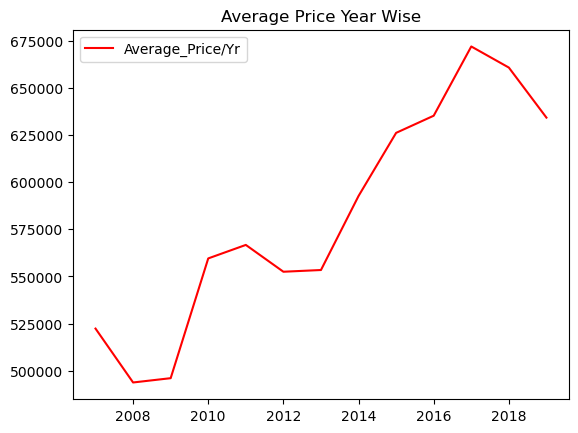

In [7]:
group = df['price'].groupby(df.index.year).mean()
plt.plot(group.index, group.values, color = 'r', label = 'Average_Price/Yr')
plt.title('Average Price Year Wise')
plt.legend()
plt.show()

##### __6. Count of properties sold per year__

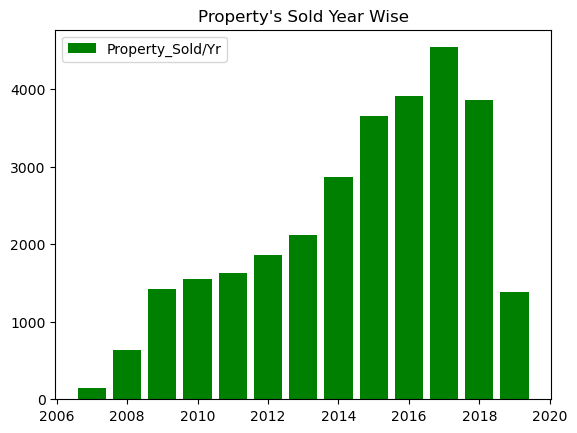

In [8]:
group = df.groupby(df.index.year).count()
plt.bar(group.index, group.values[:, 0], color = 'g', label = 'Property_Sold/Yr')
plt.title('Property\'s Sold Year Wise')
plt.legend()
plt.show()

##### __7. Query for a specific date range (e.g., Jan 2010 to Dec 2015)__

In [9]:
df2 = df[(df.index > '1/1/2010') & (df.index <= '31/12/2015')]
df2

,postcode,price,propertyType,bedrooms
datesold,,,,
2010-01-04,2615,435000,house,3
2010-01-05,2904,712000,house,4
2010-01-06,2617,435000,house,4
2010-01-06,2606,1350000,house,5
2010-01-07,2905,612500,house,4
...,...,...,...,...
2015-12-23,2603,415000,unit,2
2015-12-23,2612,438000,unit,2
2015-12-23,2612,450000,unit,2


##### __8. Calculate the mean price month-wise (use Groupby)__

In [10]:
df2['price'].groupby(df2.index.month).mean()

datesold
1     544888.799283
2     563432.444644
3     591471.616919
4     576216.768116
5     582079.192840
6     567459.933735
7     561843.308653
8     565462.996815
9     586977.304541
10    597253.885895
11    624797.507752
12    597433.875000
Name: price, dtype: float64

##### __9. Perform a histogram plot__

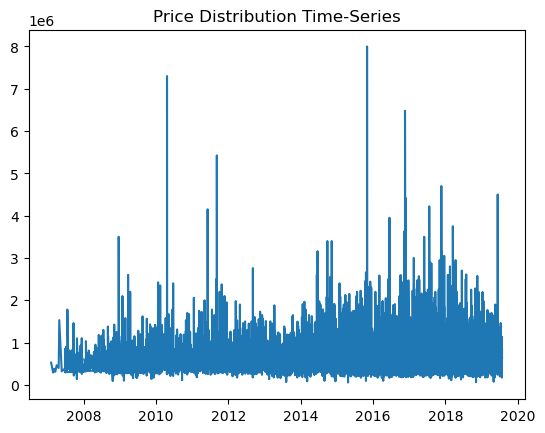

In [11]:
plt.plot(df['price'])
plt.title('Price Distribution Time-Series')
plt.show()

##### __10. Print the property price > 5Lakhs__

In [12]:
df[df['price'] > 500000]

,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07,2607,525000,house,4
2007-04-30,2606,1530000,house,4
2007-06-27,2612,850000,house,4
2007-06-28,2904,765000,house,4
2007-06-30,2615,517000,house,4
...,...,...,...,...
2019-07-23,2912,549950,unit,3
2019-07-24,2601,590000,unit,1
2019-07-25,2612,560000,unit,2
